<a href="https://colab.research.google.com/github/Stapleru/ml/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт всего необходимого

In [173]:

import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn import preprocessing
import random
le = preprocessing.LabelEncoder()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from datetime import datetime
%matplotlib inline     

#Проверка таблицы

In [174]:
#from google.colab import drive
#drive.mount('/content/drive/')
import os
#os.chdir("/content/drive/My Drive/Colab Notebooks")
df = pd.read_csv("../data/genres_v2.csv")

C:\Users\Stapler\AppData\Local\Temp\ipykernel_13984\4040520011.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/genres_v2.csv")


In [175]:
#df = pd.read_csv("genres_v2.csv")
df.head(5)      

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

# Стоит отбросить ненужные столбцы

In [177]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [178]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

# Совершенно не нужны - id, uri, track_href, alaysis_url, song_name, Unnamed: 0, title

In [179]:
df = df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title'], axis=1)
df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap


# Также стоит дропнуть дупликаты

In [180]:
print("duplicates: ", df[df.duplicated()].shape)
df = df.drop_duplicates()
df = df.dropna()

remove_n = 25000
drop_indices = np.random.choice(df.index, remove_n, replace=False)
df = df.drop(drop_indices)


df.count()


duplicates:  (4180, 14)


danceability        13125
energy              13125
key                 13125
loudness            13125
mode                13125
speechiness         13125
acousticness        13125
instrumentalness    13125
liveness            13125
valence             13125
tempo               13125
duration_ms         13125
time_signature      13125
genre               13125
dtype: int64

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13125 entries, 0 to 42292
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      13125 non-null  float64
 1   energy            13125 non-null  float64
 2   key               13125 non-null  int64  
 3   loudness          13125 non-null  float64
 4   mode              13125 non-null  int64  
 5   speechiness       13125 non-null  float64
 6   acousticness      13125 non-null  float64
 7   instrumentalness  13125 non-null  float64
 8   liveness          13125 non-null  float64
 9   valence           13125 non-null  float64
 10  tempo             13125 non-null  float64
 11  duration_ms       13125 non-null  int64  
 12  time_signature    13125 non-null  int64  
 13  genre             13125 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 1.5+ MB


<AxesSubplot: title={'center': 'Genres'}>

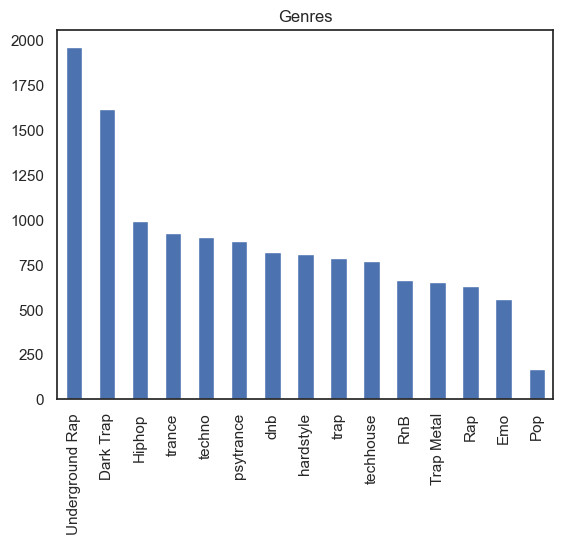

In [182]:
df['genre'].value_counts().plot(kind="bar", title="Genres")

In [183]:
c = df.copy()
c['genre']  = le.fit_transform(c['genre'])
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13125 entries, 0 to 42292
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      13125 non-null  float64
 1   energy            13125 non-null  float64
 2   key               13125 non-null  int64  
 3   loudness          13125 non-null  float64
 4   mode              13125 non-null  int64  
 5   speechiness       13125 non-null  float64
 6   acousticness      13125 non-null  float64
 7   instrumentalness  13125 non-null  float64
 8   liveness          13125 non-null  float64
 9   valence           13125 non-null  float64
 10  tempo             13125 non-null  float64
 11  duration_ms       13125 non-null  int64  
 12  time_signature    13125 non-null  int64  
 13  genre             13125 non-null  int32  
dtypes: float64(9), int32(1), int64(4)
memory usage: 1.5 MB


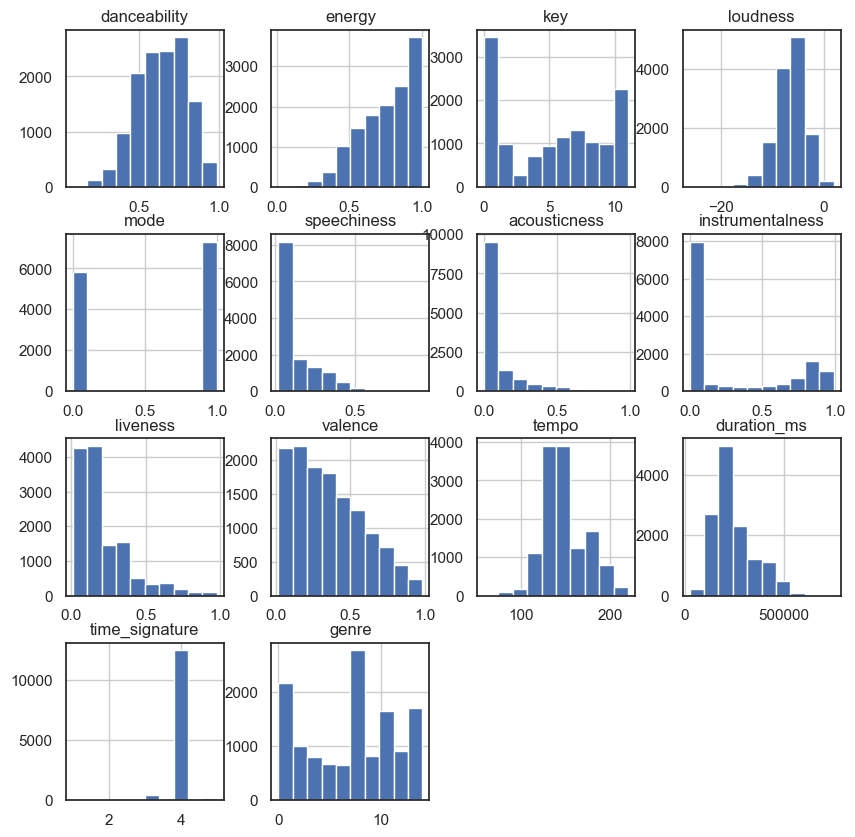

In [184]:
histograms = c.hist(figsize=(10,10))
plt.show()

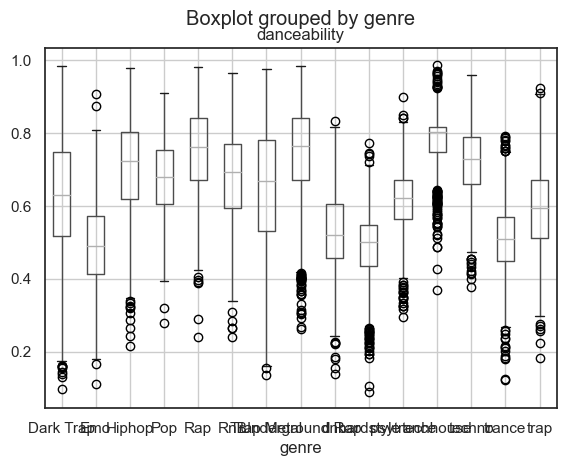

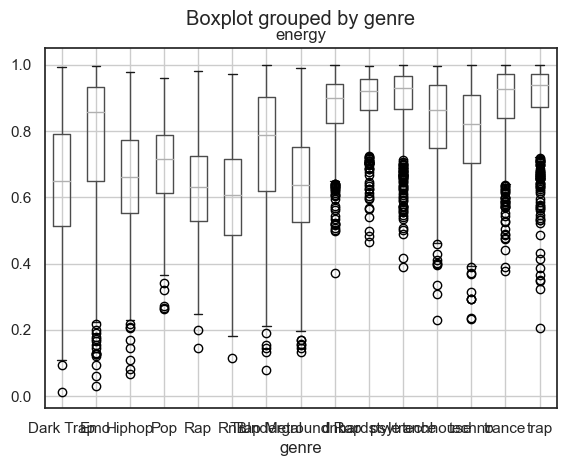

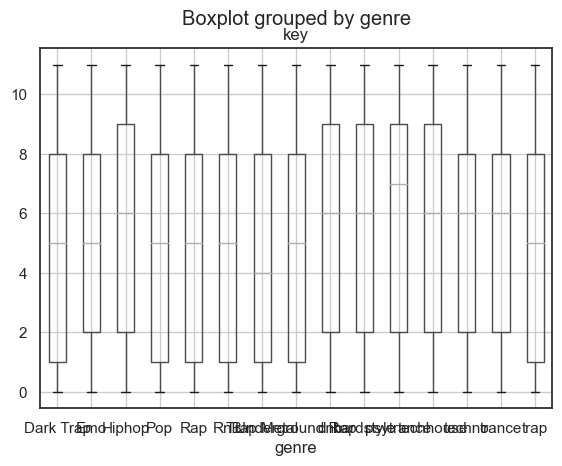

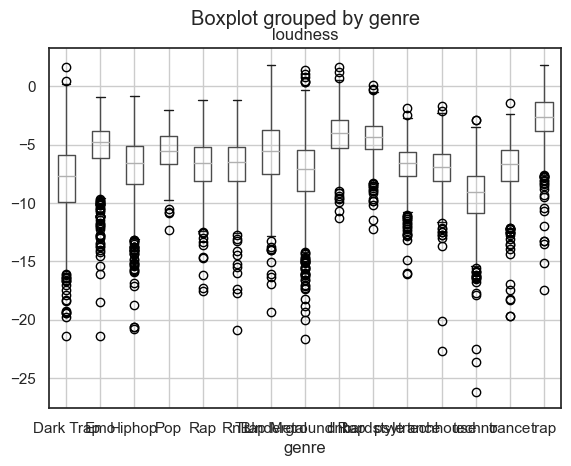

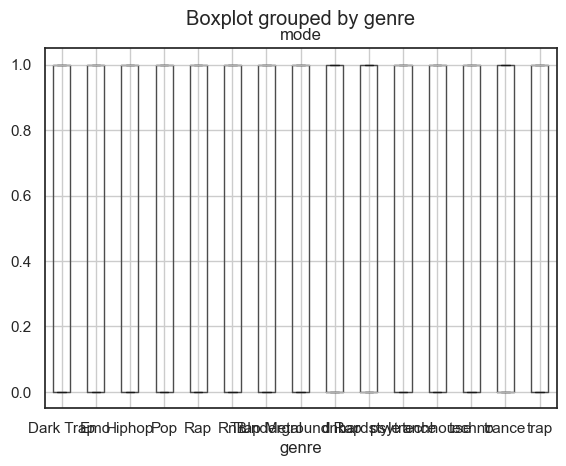

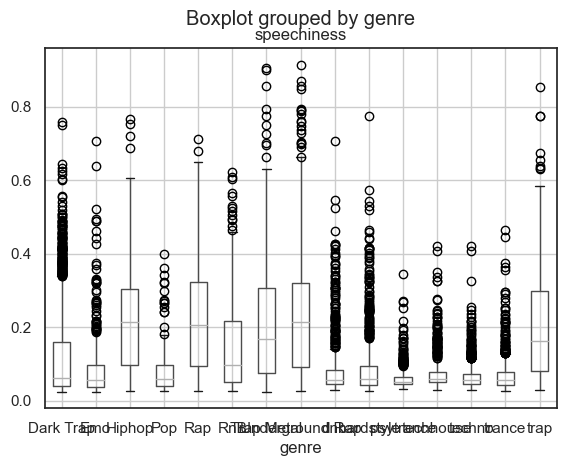

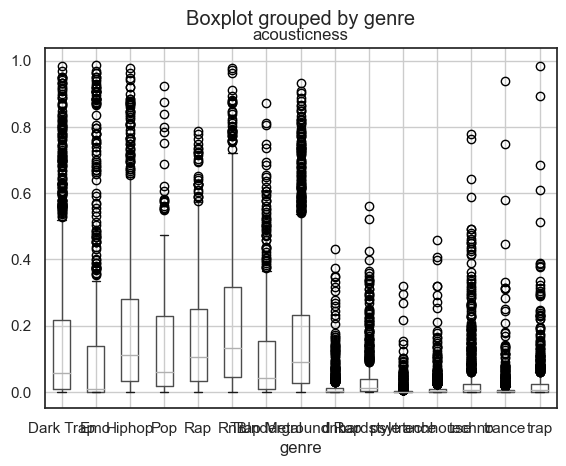

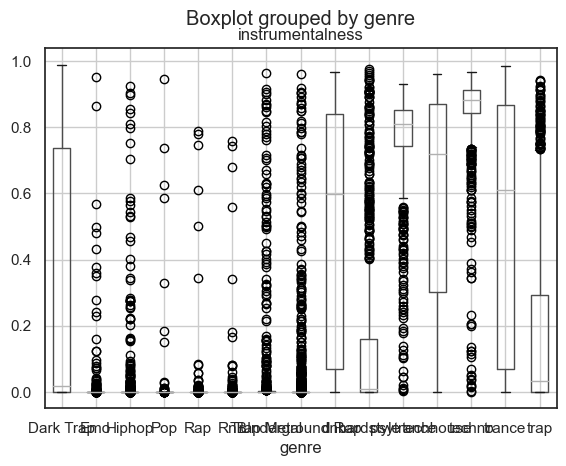

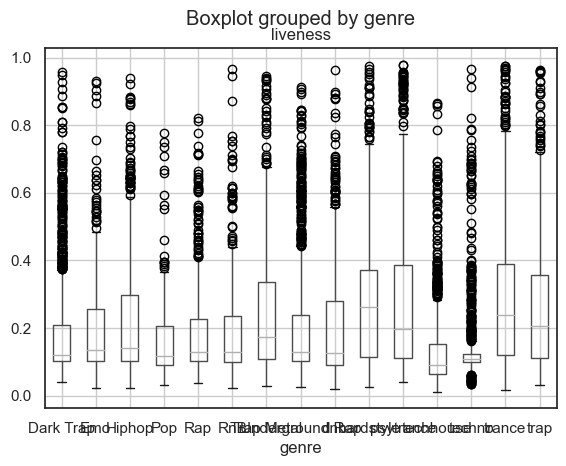

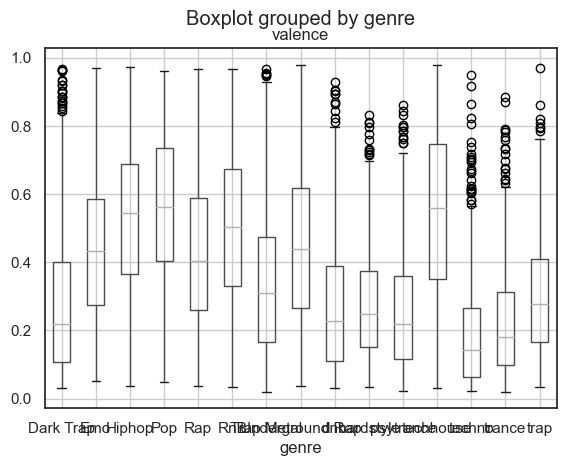

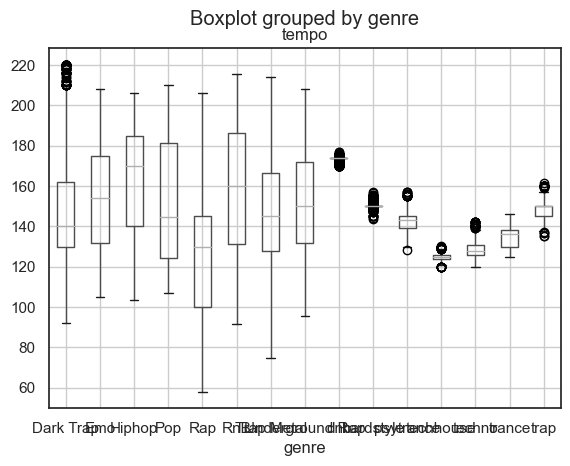

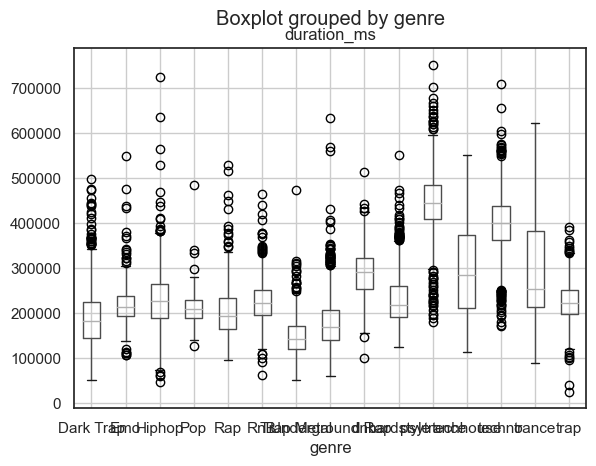

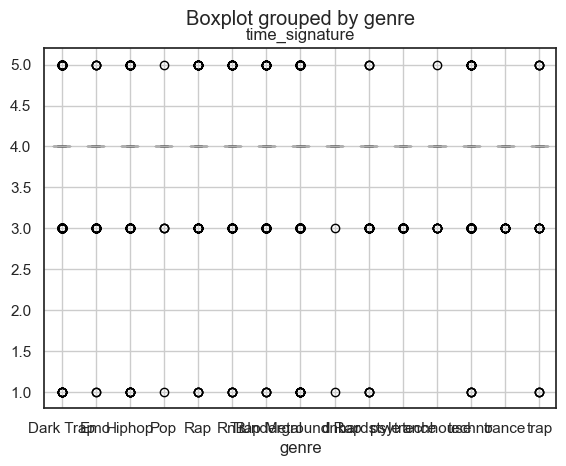

In [185]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
for col in df.select_dtypes(include=np.number).columns.tolist():
  df.boxplot(by ='genre', column =[col], grid = True)

In [186]:
#pd.plotting.scatter_matrix(df, figsize = [20,20]) #- если вдруг захочется посмотреть на матрицы рассеивания

In [187]:
X = df.copy()
X['genre']  = le.fit_transform(X['genre'])
y = X.pop('genre') 
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661,3
5,0.721,0.568,0,-11.295,1,0.4140,0.045200,0.212000,0.1280,0.1090,144.915,112511,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42267,0.484,0.962,9,-4.106,0,0.2480,0.019100,0.000007,0.3530,0.1190,151.955,201052,4
42283,0.431,0.800,0,-4.755,0,0.0736,0.009110,0.000004,0.4810,0.5930,149.991,166396,4
42285,0.623,0.899,6,-7.155,1,0.2730,0.000609,0.841000,0.0399,0.0368,150.003,434271,4
42289,0.329,0.928,1,-4.261,0,0.0777,0.004620,0.000158,0.2410,0.1430,155.311,186194,4


In [188]:
sm=SMOTE()
X_std = preprocessing.StandardScaler().fit_transform(X)
X,y=sm.fit_resample(X_std,y)

<AxesSubplot: title={'center': 'Genres'}>

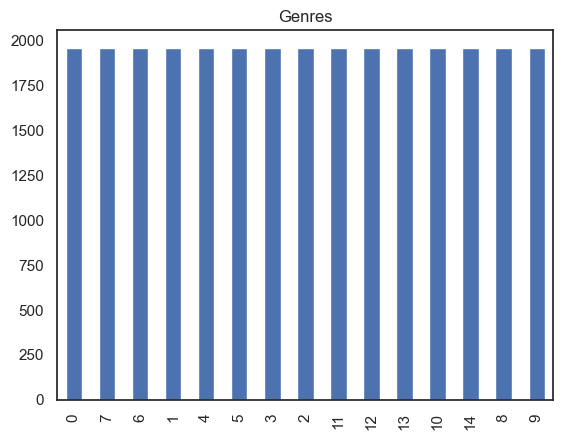

In [189]:
y.value_counts().plot(kind="bar", title="Genres")

<AxesSubplot: >

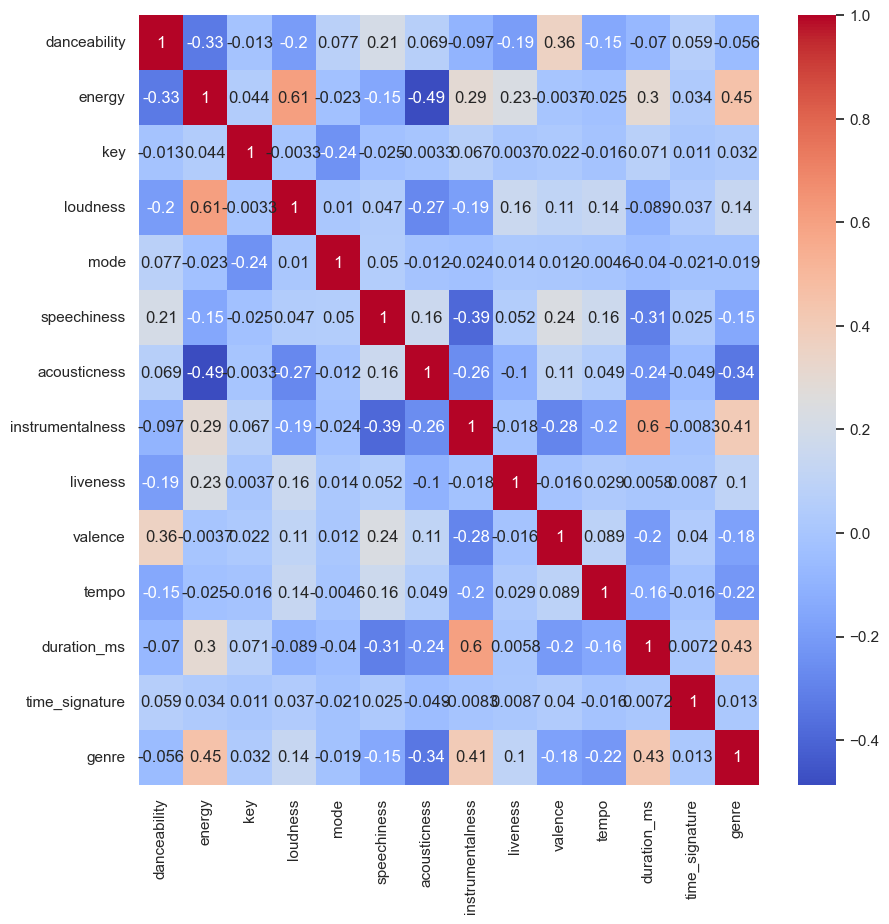

In [190]:
plt.figure(figsize=(10,10))
sns.heatmap(c.corr(), annot = True, cmap= 'coolwarm')

# **ОТСЮДА НАЧИНАЕТСЯ ПО ФАКТУ ВТОРАЯ РАБОТА**

# PCA

In [191]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state = 1, shuffle = True)

# Для примера возьмём неглубокое дерево решений
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred.round(0)))

              precision    recall  f1-score   support

           0       0.52      0.27      0.36       392
           1       0.71      0.68      0.70       392
           2       0.42      0.43      0.43       391
           3       0.48      0.57      0.52       391
           4       0.47      0.58      0.52       391
           5       0.40      0.40      0.40       392
           6       0.51      0.61      0.55       391
           7       0.32      0.23      0.27       391
           8       0.96      0.96      0.96       392
           9       0.77      0.86      0.81       392
          10       0.91      0.91      0.91       391
          11       0.88      0.90      0.89       392
          12       0.87      0.86      0.86       392
          13       0.75      0.85      0.80       392
          14       0.75      0.68      0.72       392

    accuracy                           0.65      5874
   macro avg       0.65      0.65      0.65      5874
weighted avg       0.65   

In [192]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd 
sns.set(style="white")
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, decomposition
from imblearn.over_sampling import SMOTE

pca = decomposition.PCA(n_components=13)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

In [193]:
for i, component in enumerate(pca.components_):
    print(
        "{} component: {}% of initial variance".format(
            i + 1, round(100 * pca.explained_variance_ratio_[i], 2)
        )
    )

1 component: 19.79% of initial variance
2 component: 15.1% of initial variance
3 component: 10.55% of initial variance
4 component: 9.97% of initial variance
5 component: 7.3% of initial variance
6 component: 7.1% of initial variance
7 component: 6.63% of initial variance
8 component: 5.93% of initial variance
9 component: 5.58% of initial variance
10 component: 4.59% of initial variance
11 component: 3.31% of initial variance
12 component: 2.76% of initial variance
13 component: 1.4% of initial variance


Теперь проверка с уменьшением размерности.

In [194]:
pca = decomposition.PCA(n_components=12)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

In [195]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=1, shuffle= True
)

In [196]:
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred.round(0)))

              precision    recall  f1-score   support

           0       0.38      0.29      0.33       392
           1       0.56      0.62      0.58       392
           2       0.38      0.28      0.32       391
           3       0.56      0.59      0.57       391
           4       0.42      0.58      0.49       391
           5       0.44      0.38      0.41       392
           6       0.46      0.53      0.49       391
           7       0.29      0.29      0.29       391
           8       0.81      0.83      0.82       392
           9       0.53      0.61      0.57       392
          10       0.77      0.78      0.77       391
          11       0.76      0.70      0.73       392
          12       0.68      0.75      0.71       392
          13       0.62      0.57      0.59       392
          14       0.68      0.55      0.61       392

    accuracy                           0.56      5874
   macro avg       0.56      0.56      0.55      5874
weighted avg       0.56   

Судя по оценке, качество работы алгоритма ощутимо ухудшилось.

# k-means

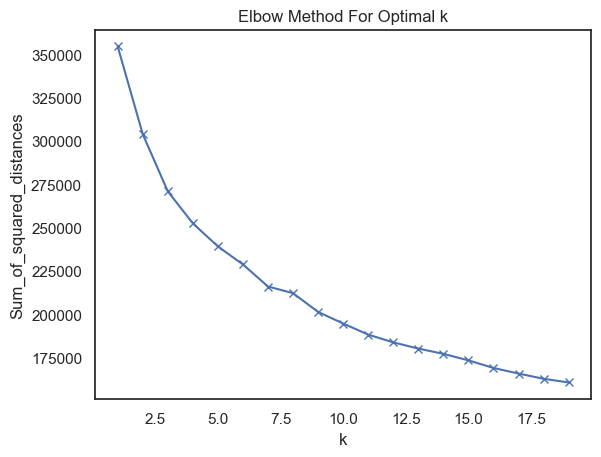

In [197]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Text(0.5, 1.0, 'PCA')

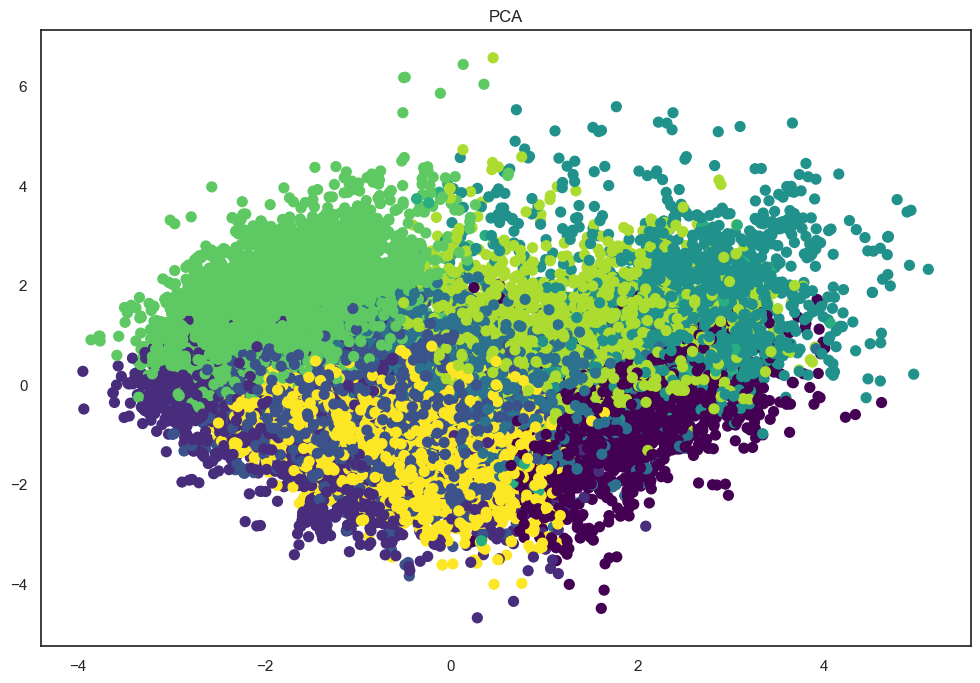

In [231]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=9, random_state=1)

kmeans.fit(X) 


# Visualizing using PCA
pca = PCA(n_components=13)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

# DBSCAN

In [209]:
dbscan = DBSCAN().fit(X)

Text(0.5, 1.0, 'PCA')

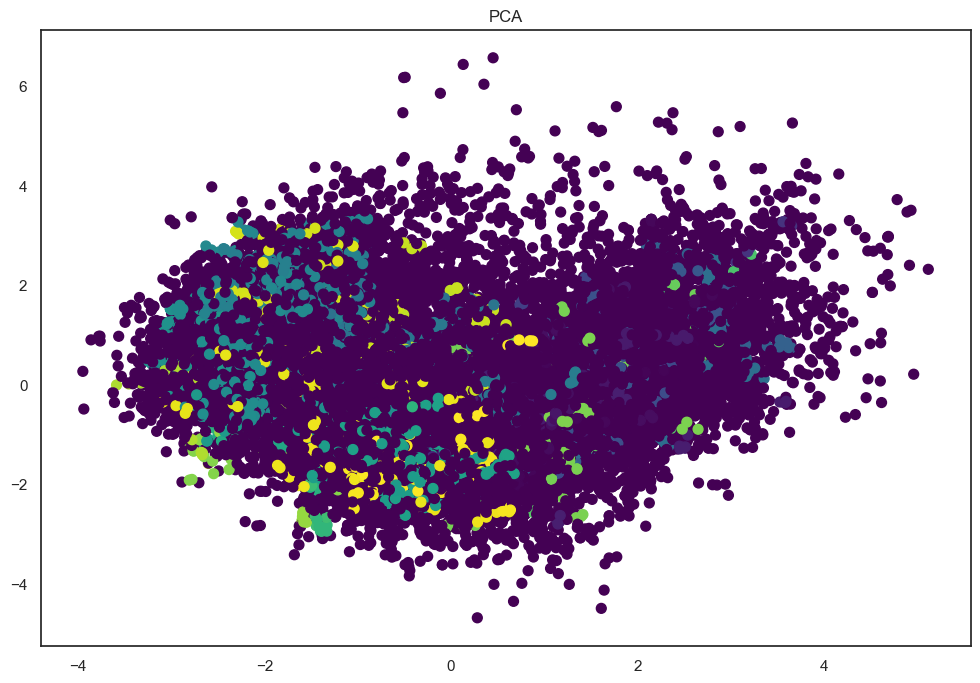

In [210]:
# Visualizing using PCA
pca = PCA(n_components=13)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=dbscan.labels_, s=50, cmap='viridis')
plt.title('PCA')

# Иерархическая кластеризация

In [212]:
agglomerative = AgglomerativeClustering(n_clusters = 9).fit(X)

Text(0.5, 1.0, 'PCA')

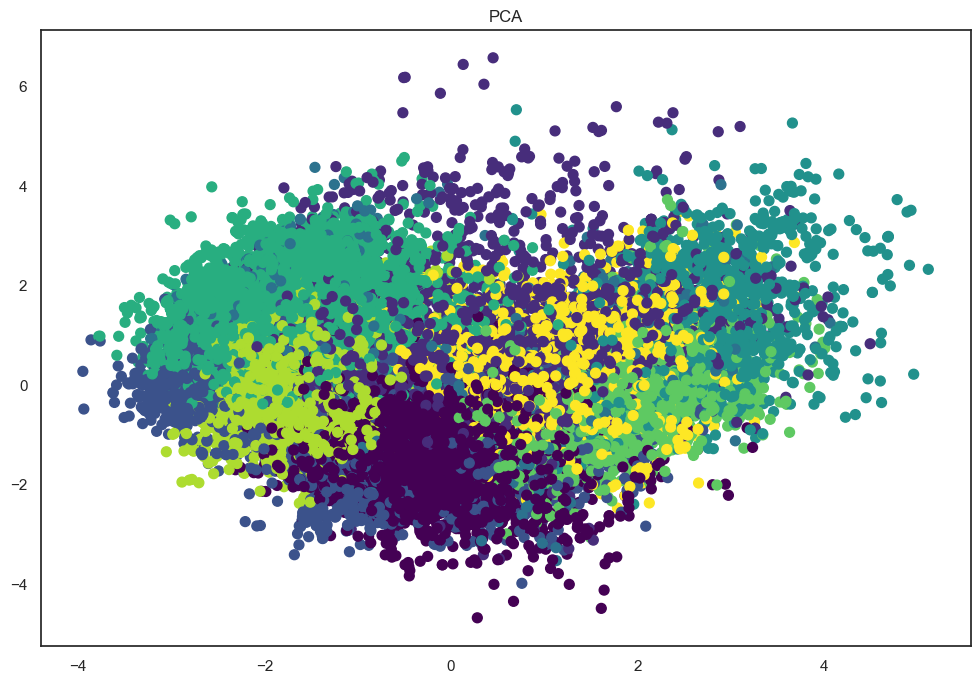

In [213]:
# Visualizing using PCA
pca = PCA(n_components=13)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=agglomerative.labels_, s=50, cmap='viridis')
plt.title('PCA')

# Mean-Shift

In [215]:
shift = MeanShift(bandwidth=0.9).fit(X)

Text(0.5, 1.0, 'PCA')

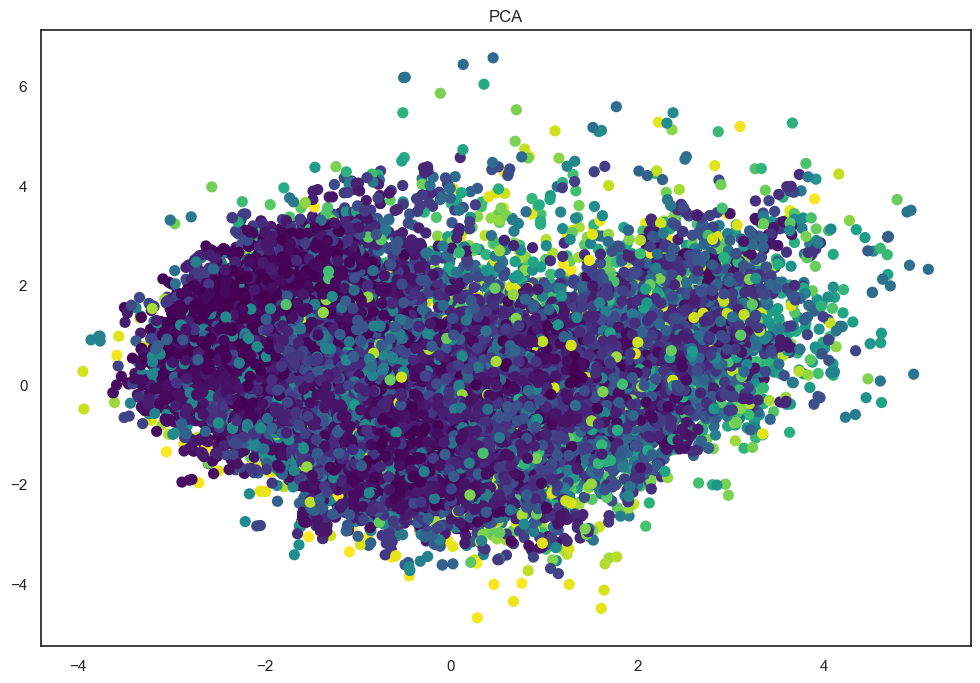

In [216]:
# Visualizing using PCA
pca = PCA(n_components=13)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=shift.labels_, s=50, cmap='viridis')
plt.title('PCA')

# EM

In [220]:
gm = GaussianMixture(n_components=15, random_state=1).fit(X)

Text(0.5, 1.0, 'PCA')

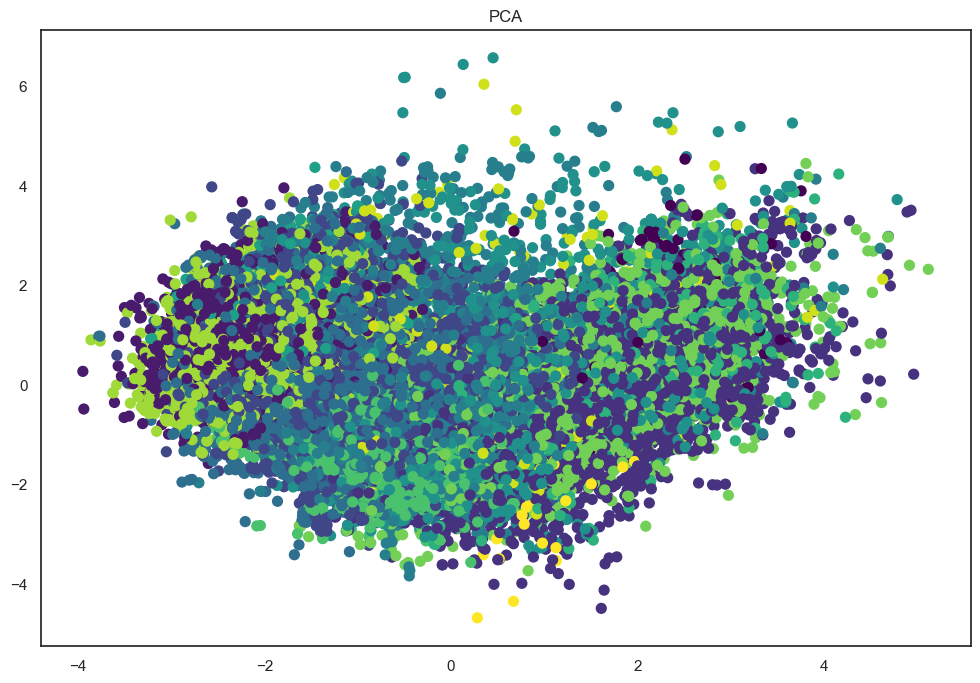

In [221]:
pca = PCA(n_components=13)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=gm.predict(X), s=50, cmap='viridis')
plt.title('PCA')

# Оценка

In [230]:
import pandas as pd
from sklearn import datasets, metrics
from sklearn.cluster import (
    AffinityPropagation,
    AgglomerativeClustering,
    KMeans,
    SpectralClustering,
    MeanShift,
    DBSCAN,
)
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
algorithms = []
algorithms.append(KMeans(n_clusters=9, random_state=1))
algorithms.append(AgglomerativeClustering(n_clusters=9))
algorithms.append(DBSCAN())
algorithms.append(MeanShift(bandwidth=0.9))
gm = GaussianMixture(n_components=15, random_state=1).fit(X)

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(
        (
            {
                "ARI": metrics.adjusted_rand_score(y, algo.labels_),
                "AMI": metrics.adjusted_mutual_info_score(y, algo.labels_),
                "Homogenity": metrics.homogeneity_score(y, algo.labels_),
                "Completeness": metrics.completeness_score(y, algo.labels_),
                "V-measure": metrics.v_measure_score(y, algo.labels_),
                "Silhouette": metrics.silhouette_score(X, algo.labels_),
            }
        )
    )
data.append(
        (
            {
                "ARI": metrics.adjusted_rand_score(y, gm.predict(X)),
                "AMI": metrics.adjusted_mutual_info_score(y, gm.predict(X)),
                "Homogenity": metrics.homogeneity_score(y, gm.predict(X)),
                "Completeness": metrics.completeness_score(y, gm.predict(X)),
                "V-measure": metrics.v_measure_score(y, gm.predict(X)),
                "Silhouette": metrics.silhouette_score(X, gm.predict(X)),
            }
        )
    )
results = pd.DataFrame(
    data=data,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["K-means", "Agglomerative", "DBSCAN", "MeanShift", "EM"],
)

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.147530,0.276024,0.242467,0.321940,0.276608,0.129564
Agglomerative,0.136567,0.259045,0.228579,0.300465,0.259638,0.074141
DBSCAN,0.006887,0.199669,0.227038,0.311894,0.262785,-0.395140
MeanShift,0.008620,0.278508,0.903736,0.290689,0.439888,0.296997
EM,0.088682,0.230041,0.209323,0.257959,0.231110,-0.008312
